In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:

import IPython

!pip install -U keras-tuner
import kerastuner

import tensorflow as tf
import kerastuner as kt
print(tf.__version__)
print(kt.__version__)

     |████████████████████████████████| 61kB 1.8MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.1-cp36-none-any.whl size=73200 sha256=ff192659a1eed1661c8687e1c54f6de1514c5f0411850704633d9100ea852ca9
  Stored in directory: /root/.cache/pip/wheels/b9/cc/62/52716b70dd90f3db12519233c3a93a5360bc672da1a10ded43
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15356 sha256=529be5b06035f44d9d5f9a1da197d044034ebb3bfedfb7d5c92e5a5d92b1cb3d
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables
2.3.0
1.0.1


In [7]:
from tensorflow.keras.datasets import boston_housing
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


**Model Without Tuning**

In [8]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import models, layers# set random seed
from numpy.random import seed
seed(42)
import tensorflow
tensorflow.random.set_seed(42)# preprocessing - normalization
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)# model building
model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=(x_train.shape[1],)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(1))# compile model using rmsprop
model.compile(optimizer='rmsprop',loss='mse',metrics=['mse'])# model training
history = model.fit(x_train_scaled, y_train, validation_split=0.2, epochs=10)# model evaluation
model.evaluate(x_test_scaled, y_test)

Epoch 1/10
11/11 [==============================] - 0s 14ms/step - loss: 568.7303 - mse: 568.7303 - val_loss: 627.1449 - val_mse: 627.1449
Epoch 2/10
11/11 [==============================] - 0s 3ms/step - loss: 555.4802 - mse: 555.4802 - val_loss: 614.4634 - val_mse: 614.4634
Epoch 3/10
11/11 [==============================] - 0s 4ms/step - loss: 542.7706 - mse: 542.7706 - val_loss: 603.5865 - val_mse: 603.5865
Epoch 4/10
11/11 [==============================] - 0s 4ms/step - loss: 532.2389 - mse: 532.2389 - val_loss: 592.0689 - val_mse: 592.0689
Epoch 5/10
11/11 [==============================] - 0s 3ms/step - loss: 524.3663 - mse: 524.3663 - val_loss: 580.4174 - val_mse: 580.4174
Epoch 6/10
11/11 [==============================] - 0s 3ms/step - loss: 510.7414 - mse: 510.7414 - val_loss: 567.9651 - val_mse: 567.9651
Epoch 7/10
11/11 [==============================] - 0s 3ms/step - loss: 498.7845 - mse: 498.7845 - val_loss: 554.9809 - val_mse: 554.9809
Epoch 8/10
11/11 [===============

[488.33251953125, 488.33251953125]

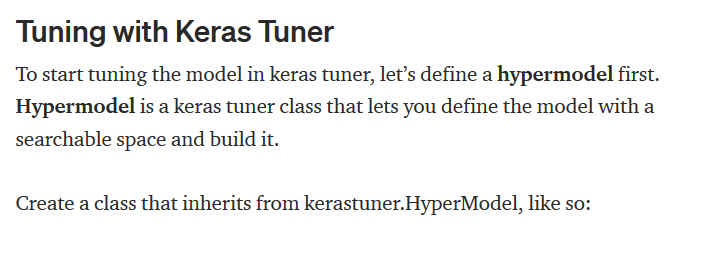

In [11]:
from kerastuner import HyperModel
class RegressionHyperModel(HyperModel):
  def __init__(self, input_shape):
      self.input_shape = input_shape    
  def build(self, hp):
      model = Sequential()
      model.add(
          layers.Dense(
              units=hp.Int('units', 8, 64, 4, default=8),
              activation=hp.Choice(
                  'dense_activation',
                  values=['relu', 'tanh', 'sigmoid'],
                  default='relu'),
              input_shape=input_shape
          )
      )
      
      model.add(
          layers.Dense(
              units=hp.Int('units', 16, 64, 4, default=16),
              activation=hp.Choice(
                  'dense_activation',
                  values=['relu', 'tanh', 'sigmoid'],
                  default='relu')
          )
      )
      
      model.add(
          layers.Dropout(
              hp.Float(
                  'dropout',
                  min_value=0.0,
                  max_value=0.1,
                  default=0.005,
                  step=0.01)
          )
      )
      
      model.add(layers.Dense(1))
      
      model.compile(
          optimizer='rmsprop',loss='mse',metrics=['mse']
      )
      
      return model

**Hyperparameter Methods**


https://keras-team.github.io/keras-tuner/documentation/hyperparameters/

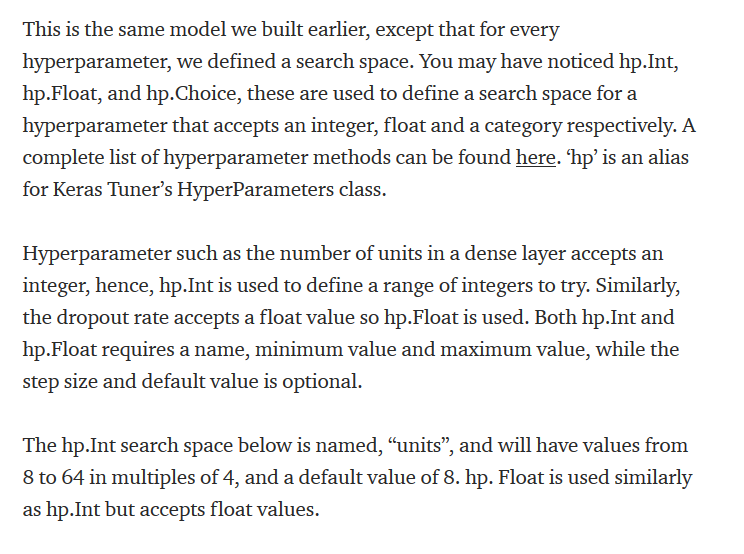

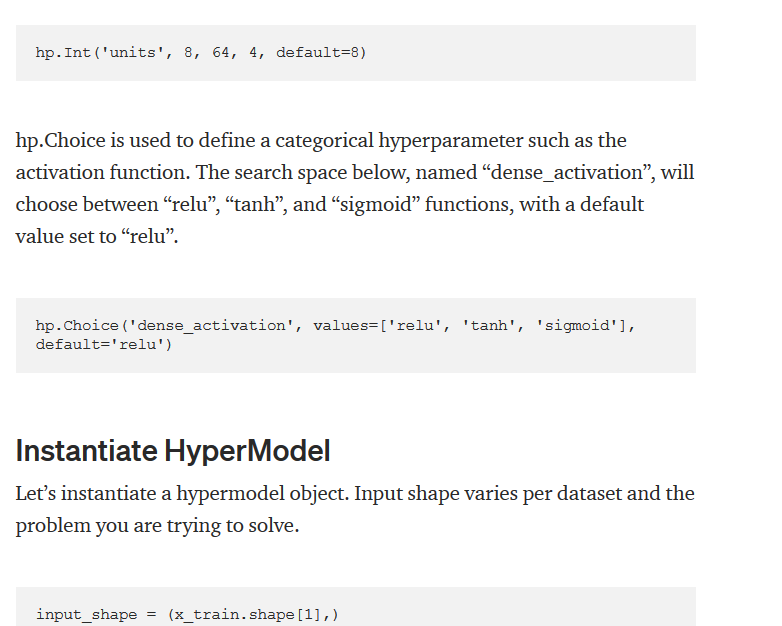

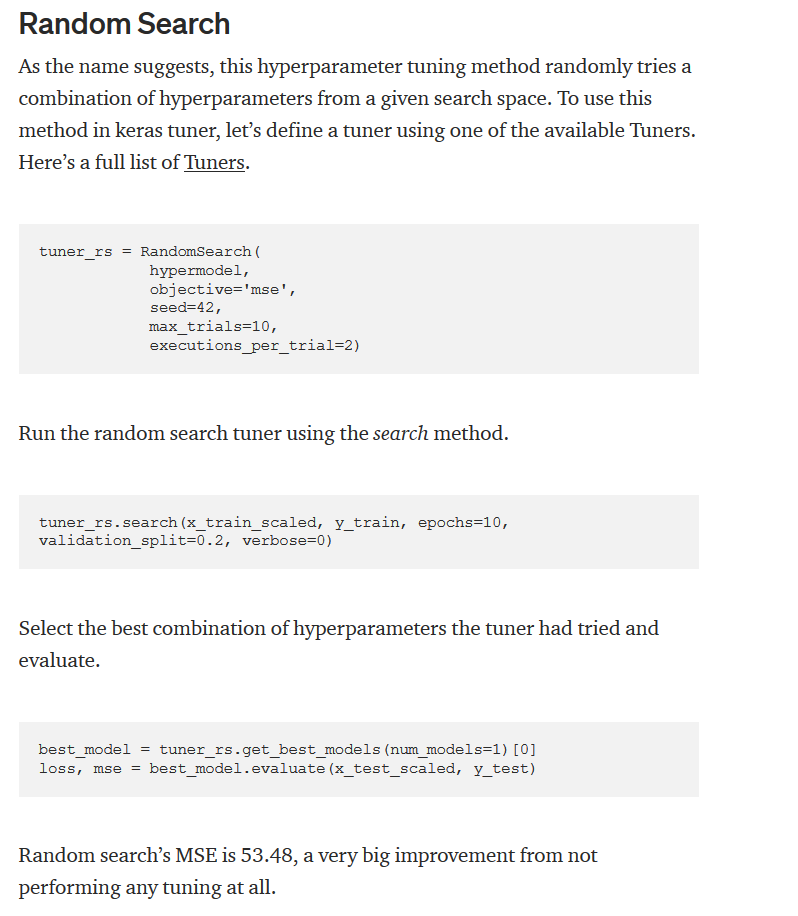

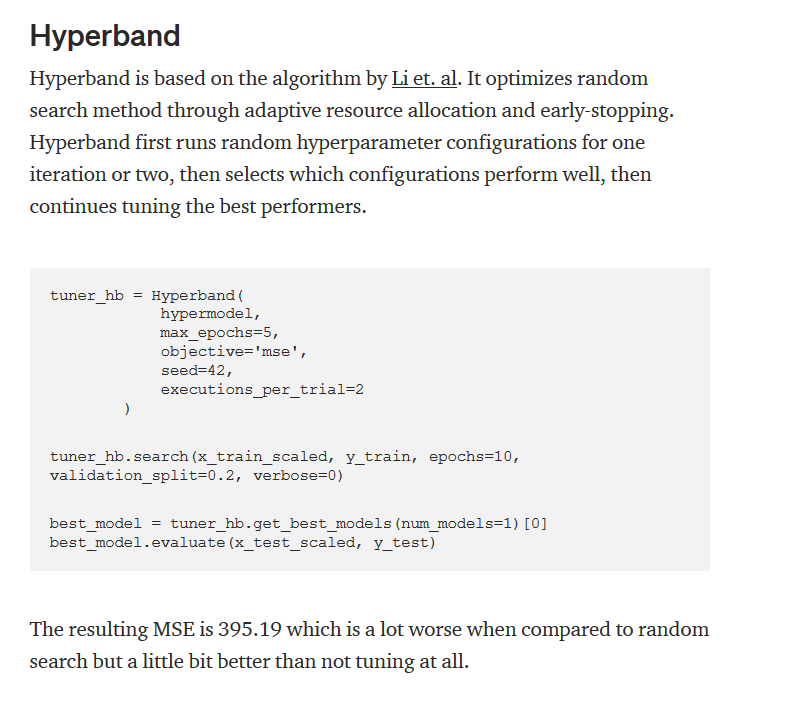

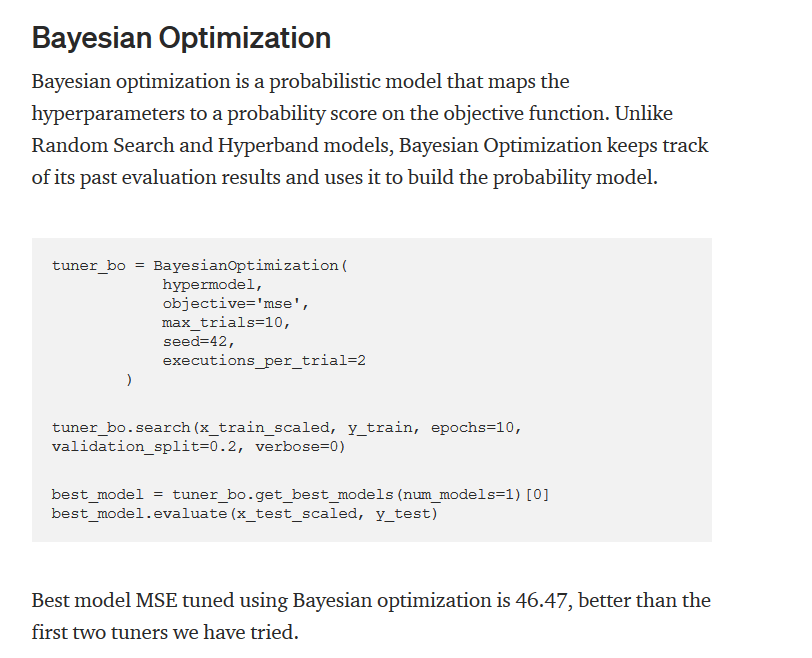

In [ ]:
kt.BayesianOptimization